## Importing Python Libraries and Supressing Warnings 

In [1]:
import warnings
warnings.filterwarnings('ignore')

# numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Reading and understanding the data Importing the Data 

In [2]:
bike = pd.read_csv("day.csv", parse_dates=['dteday'])

In [3]:
# Checking the top 5 rows of the dataframe
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the last 5 rows of the dataframe
bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,2019-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,2019-12-31,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
#Checking the shape of the dataframe 
bike.shape

(730, 16)

In [6]:
# Checking the size of the dataframe
bike.size

11680

In [7]:
# How many types of each data type column exists and total memory usage
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
#Checking the numerical columns data distribution statistics
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Duplicate Checking 

In [9]:
# Creating a copy of original dataframe for duplicate check
bike_dup = bike

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

#### The shape after running the drop duplicate command is same as the original dataframe. Hence we can conclude that there were not any duplicate values in the datase

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

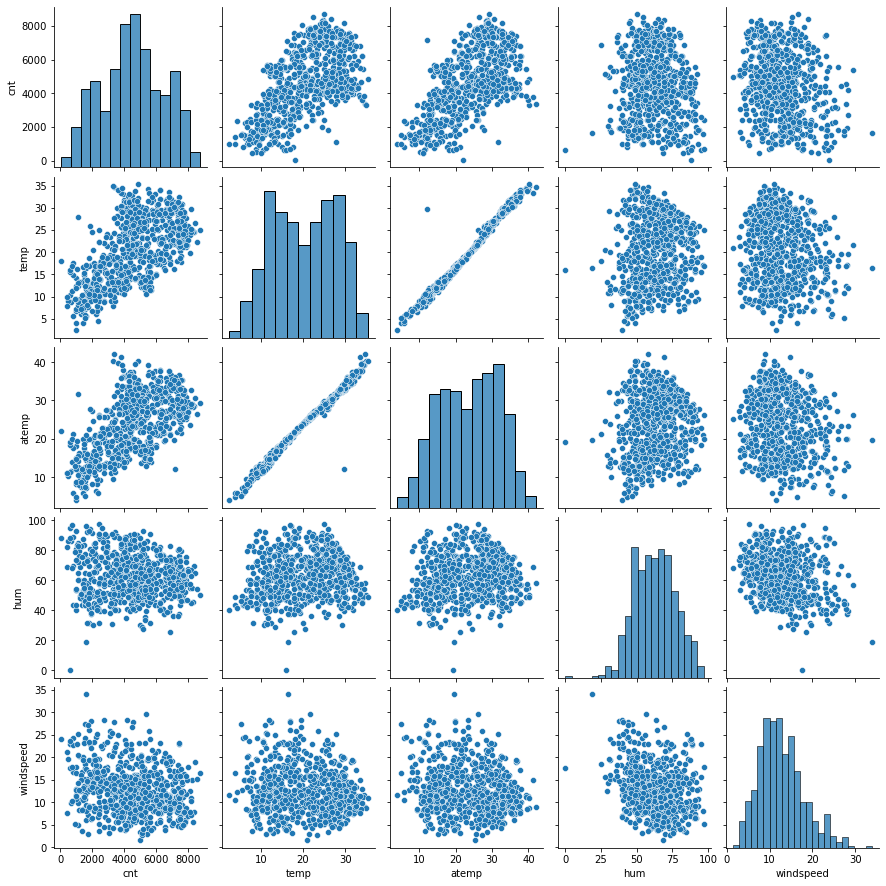

In [10]:
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Visualising Categorical Variables

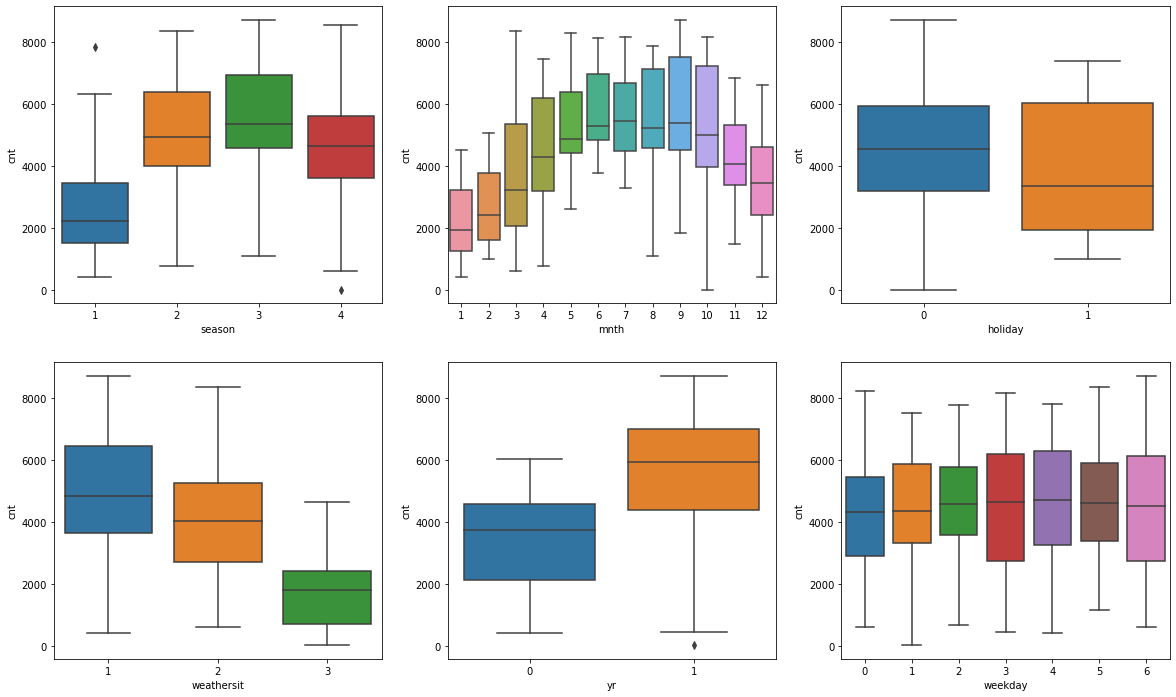

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()

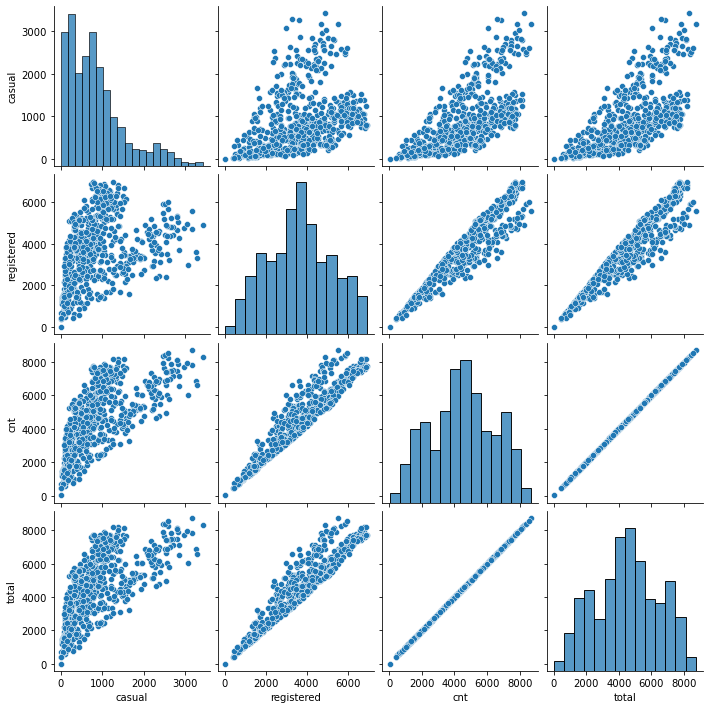

In [12]:
# Checking the relationship between casual, registered and cnt column
bike_cnt = bike[['casual','registered','cnt']]
# Creating a column whch will show the value of casual + registered
bike_cnt['total'] = bike_cnt['casual'] + bike_cnt ['registered']
sns.pairplot(bike_cnt)
plt.show()

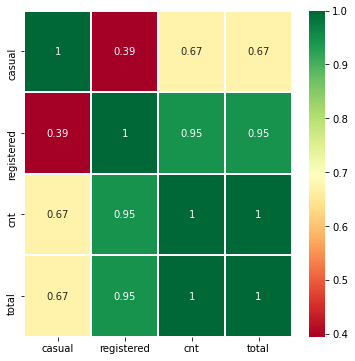

In [13]:
# also checking the correlation of the variables 
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_cnt.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

#### Based on the high level analysis of the data and the data dictionary, the following variables can be removed from further analysis -

- instant: It is only an index value
- dteday: This has the date, Since we already have separate columns for 'year' & 'month' we could live without this column
- casual & registered: Both these columns contains the count of bike booked by different categories of customers. From the pairplot as well as the correlation heatmap, we can concur that total bike rental value 'cnt = 'casual' + 'registered'. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [14]:
#dropping the unwanted columns
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.shape

(730, 12)

#### Encoding Categorical columns 

- Converting season, mnth,weathersit and weekday to categorical columns
- season: converting season values as per criteria - 1:Spring, 2:Summer, 3:Fall, 4:Winter
- mnth: converting mnth values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
- weathersit: converting weathersit values as 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
- weekday: converting weekday values as 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat

In [15]:
#Converting season
bike.season.replace((1,2,3,4), ('W1_Spring','W2_Summer','W3_Fall','W4_Winter'), inplace=True)
bike.season.value_counts(normalize=True)

W3_Fall      0.257534
W2_Summer    0.252055
W1_Spring    0.246575
W4_Winter    0.243836
Name: season, dtype: float64

In [16]:
#Converting mnth
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.mnth.value_counts(normalize=True)

Dec    0.084932
May    0.084932
Jan    0.084932
Oct    0.084932
Mar    0.084932
Jul    0.084932
Aug    0.084932
Jun    0.082192
Apr    0.082192
Nov    0.082192
Sep    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [17]:
#Converting weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [18]:
#Converting weathersit
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)

Sunday       0.143836
Monday       0.143836
Saturday     0.143836
Tuesday      0.142466
Thursday     0.142466
Friday       0.142466
Wednesday    0.141096
Name: weekday, dtype: float64

In [19]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = bike.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
    return round(cat_df,2)

In [20]:
# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bike, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

In [21]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
W3_Fall,1061129,5644.30,188,32.24,25.75
W2_Summer,918589,4992.33,184,27.91,25.21
W4_Winter,841613,4728.16,178,25.57,24.38
W1_Spring,469514,2608.41,180,14.27,24.66


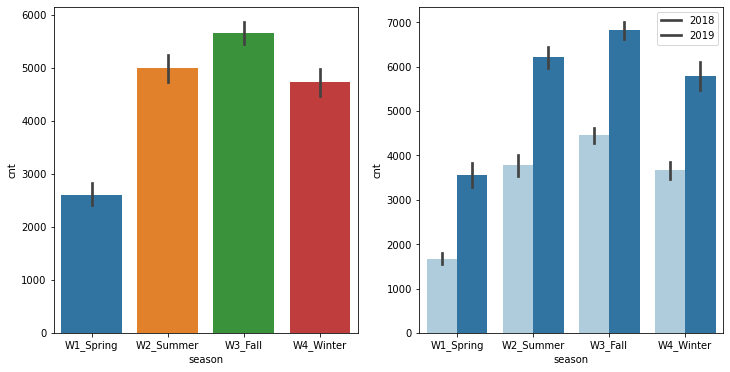

In [22]:
categorical_plot('season',12,6)


Almost 32% of the bike booking were happening in Fall with a median of over 5000 bookings (for two years). It is followed by Summer & Winter with 27% & 25% of total booking. It indicates that the season can be a good predictor of the dependent variable.

In [23]:
#mnth
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


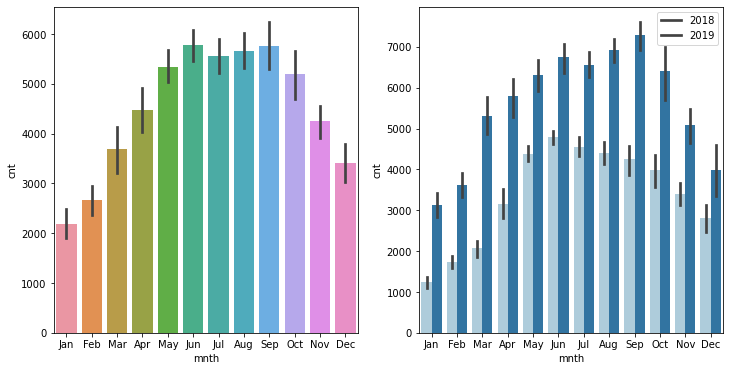

In [24]:
#mnth
categorical_plot('mnth',12,6)

#### 
Almost 10% of the bike booking was happening in the months' May to Sep with a median of over 4000 bookings per month. It indicates that the mnth has some trend for bookings and can be a good predictor for the dependent variable.

In [25]:
#weathersit
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


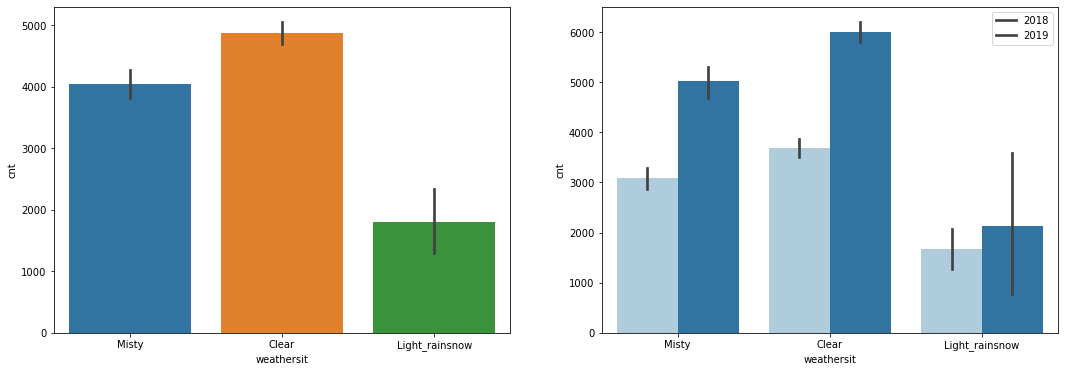

In [26]:
#weathersit plot
categorical_plot('weathersit',18,6)


Almost 68.6% of the bike booking was happening during Clear weather with a median of close to 5000 bookings (for two years). This was followed by Misty with 30% of the total booking. It indicates that the weathersit does show some trend towards the bike bookings, and it can be a good predictor for the dependent variable. The current data frame does not have any data where the weather is Heavy_RainSnow

In [27]:
#holiday
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


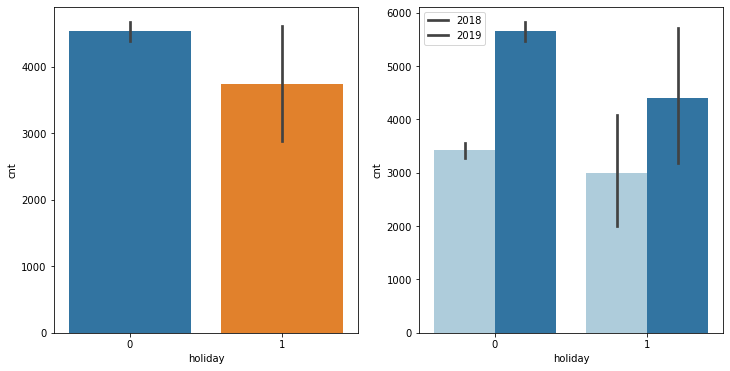

In [28]:
#holiday plot
categorical_plot('holiday',12,6)


Almost 97% of bike rentals are happening during non-holiday time.

In [29]:
#working day
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2290576,4590.33,499,69.6,68.36
0,1000269,4330.17,231,30.4,31.64


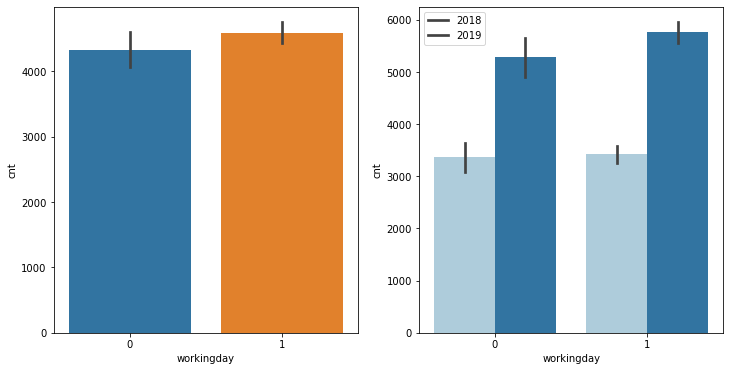

In [30]:
#working day
categorical_plot('workingday',12,6)


Almost 69% of the bike booking were happening in 'workingday' with a median of close to 5000 bookings (for two years). It indicates that the workingday can be a good predictor of the dependent variable

In [31]:
#year
categorical_stats('yr')

,sum,mean,count,sum_perc,count_perc
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


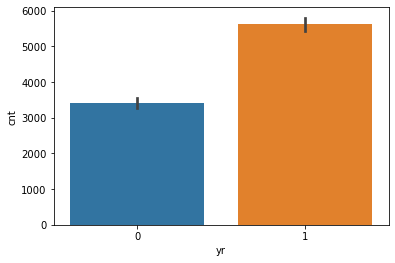

In [32]:
#year
sns.barplot('yr','cnt',data=bike)
plt.show()

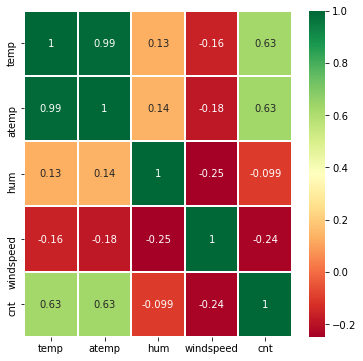

In [33]:
# Checking correlation of the parameters by mapping a correlation heatmap
bike_num = bike[['temp','atemp','hum','windspeed','cnt']]
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_num.corr(), annot = True, cmap="RdYlGn",linewidth =1)

## Dummy Variable Creation

In [34]:
#Season
season = pd.get_dummies(bike['season'], drop_first = True)
season.head(3)

,W2_Summer,W3_Fall,W4_Winter
0,0,0,0
1,0,0,0
2,0,0,0


In [35]:
#weather
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head(3)

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0


In [36]:
#month
month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head(3)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


In [37]:
#weekday
weekday = pd.get_dummies(bike['weekday'], drop_first = True)
weekday.head(3)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0


### Merging the Dataframes 

In [38]:
# Creating a new dataframe called bike_new where season, month, weather and weekday dataframe is being added
bike_new = pd.concat([bike,season,month,weather,weekday], axis = 1)
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,W1_Spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,1,0,0,0,0
1,W1_Spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,0,0,0
2,W1_Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,W1_Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,W1_Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [39]:
bike_new.shape

(730, 34)

In [40]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  W2_Summer       730 non-null    uint8  
 13  W3_Fall         730 non-null    uint8  
 14  W4_Winter       730 non-null    uint8  
 15  Aug             730 non-null    uint8  
 16  Dec             730 non-null    uint8  
 17  Feb             730 non-null    uin

## Removing unnecessary columns 

In [41]:
#deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as binary columns data
bike_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_new.shape

(730, 30)

In [42]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   W2_Summer       730 non-null    uint8  
 9   W3_Fall         730 non-null    uint8  
 10  W4_Winter       730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  Jul             730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  Mar             730 non-null    uin

## Splitting the data into Train & Test Dataset

In [43]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 333)

#### Verifying the train - test split and new dataframe details

In [44]:
bike_train.shape

(510, 30)

In [45]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.684314,20.218078,23.590696,62.340743,12.771365,4494.103922,0.245098,0.262745,...,0.084314,0.082353,0.025490,0.343137,0.139216,0.150980,0.141176,0.129412,0.141176,0.150980
std,0.500487,0.151726,0.465245,7.500110,8.138271,14.418728,5.205888,1948.315655,0.430568,0.440557,...,0.278131,0.275172,0.157763,0.475223,0.346511,0.358381,0.348545,0.335985,0.348545,0.358381
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717923,16.744800,51.604150,9.011098,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.233700,12.125057,4508.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327088,72.958300,15.624869,5962.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
bike_test.shape

(220, 30)

In [47]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,20.553817,24.040727,63.749086,12.745665,4540.236364,0.268182,0.245455,...,0.086364,0.081818,0.036364,0.322727,0.154545,0.127273,0.150000,0.172727,0.145455,0.118182
std,0.501120,0.198531,0.466833,7.533926,8.188064,13.790510,5.184271,1911.199159,0.444023,0.431338,...,0.281541,0.274713,0.187620,0.468586,0.362295,0.334038,0.357886,0.378873,0.353363,0.323559
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.189577,17.366525,53.260450,9.041851,3193.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.756250,24.762725,63.687500,12.146128,4593.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.119778,30.903325,73.333350,15.643227,5959.750000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Based on the 70% - 30% split between train and test dataset we have 510 rows in train dataset and 220 in test dataset

### Rescalling bike_train dataframe 

In [48]:
# Rescaling using MinMaxCcaler
scaler = MinMaxScaler()

In [49]:
#Dataframe before scaling 
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,1,0,0,0,0,1,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,0,0,1,0,0,1,0,0,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,1,0,0,0
502,1,0,1,23.130847,27.55605,52.3333,9.166739,7639,1,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [51]:
#Checking after rescalling
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,1,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,0,0,1,0,0,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,1,0,0,0
502,1,0,1,0.629300,0.619631,0.543723,0.235894,0.876323,1,0,...,0,0,0,0,0,0,0,0,0,0


### Checking Correlation Coefficient 

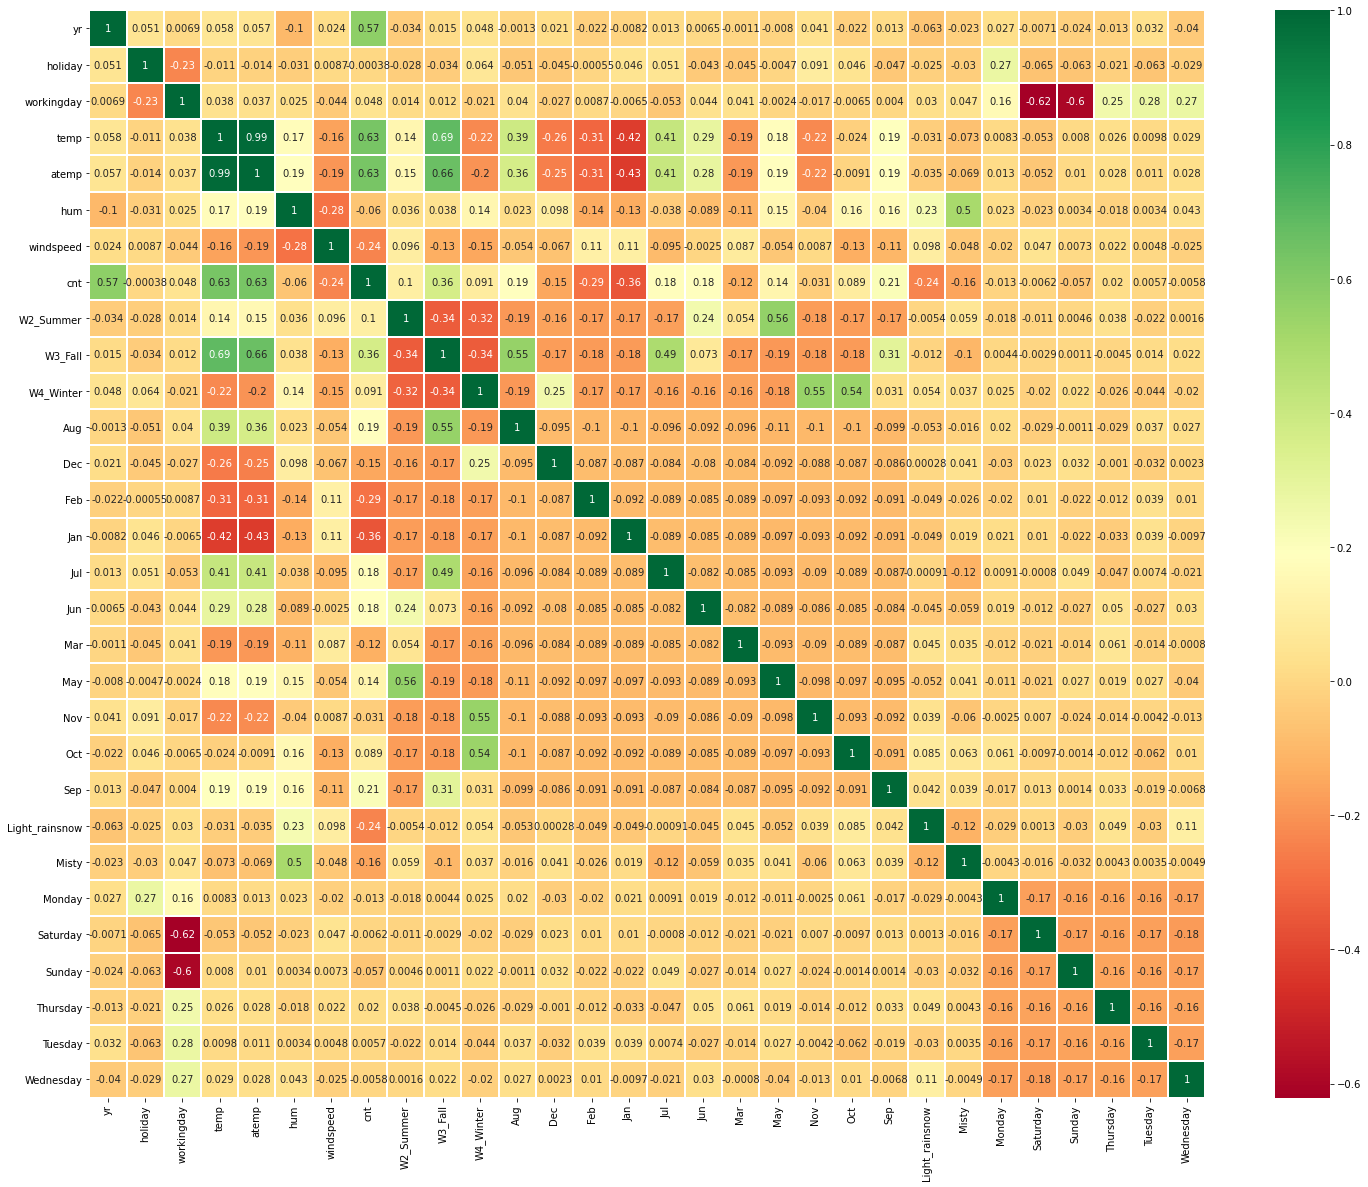

In [52]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

### Insight:
-There is multi-colinearity between the variables. We need to consider the factors when developing the model.

-temp and atemp has very high correlation value of 0.99. This suggest, we can use only one of these two variables

-workingday variable has high negative correlation with Sat & Sun (where workingday =0)

-Spring is negatively correlated with cnt

-temp, atemp and yr has strong correlation with cnt

-misty weather and humidity has correlation

-various months and corresponding weather has correlation

## Building the Linear Model 

In [53]:
#Dividing into X_train and y_train
y_train = bike_train.pop('cnt')
X_train = bike_train

#### Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility 

In [54]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [55]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('W2_Summer', True, 1),
 ('W3_Fall', True, 1),
 ('W4_Winter', True, 1),
 ('Aug', False, 9),
 ('Dec', False, 2),
 ('Feb', False, 7),
 ('Jan', False, 6),
 ('Jul', False, 3),
 ('Jun', False, 12),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 5),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 13),
 ('Tuesday', False, 10),
 ('Wednesday', False, 15)]

In [56]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'W2_Summer',
       'W3_Fall', 'W4_Winter', 'Mar', 'Nov', 'Sep', 'Light_rainsnow', 'Misty',
       'Saturday'],
      dtype='object')

In [57]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['holiday', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'May', 'Oct',
       'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [58]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Manual Model Development using statsmodel 

In [59]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Model 1

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,384.25
3,atemp,362.64
4,hum,17.60
7,W3_Fall,7.21
5,windspeed,4.75
1,workingday,4.66
8,W4_Winter,3.57
6,W2_Summer,3.51
13,Misty,2.16
0,yr,2.02


In [61]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.13e-185
Time:                        23:02:44   Log-Likelihood:                 507.29
No. Observations:                 510   AIC:                            -982.6
Df Residuals:                     494   BIC:                            -914.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1926      0.030      6.

### Model 2

In [62]:
#Both temp and atemp has high VIF but atemp has high p-value additionally. We will go ahead with dropping atemp from the equation
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,23.28
3,hum,17.31
6,W3_Fall,7.12
1,workingday,4.65
4,windspeed,4.59
7,W4_Winter,3.57
5,W2_Summer,3.51
12,Misty,2.15
0,yr,2.02
13,Saturday,1.80


In [63]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.13e-185
Time:                        23:02:44   Log-Likelihood:                 507.29
No. Observations:                 510   AIC:                            -982.6
Df Residuals:                     494   BIC:                            -914.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1926      0.030      6.

### Model 3

In [64]:
# As hum has the highest VIF value, we will remove the variable next
X_train_new = X_train_new.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,16.95
5,W3_Fall,6.86
3,windspeed,4.31
1,workingday,4.14
4,W2_Summer,3.49
6,W4_Winter,3.49
0,yr,2.02
8,Nov,1.70
12,Saturday,1.66
11,Misty,1.55


In [65]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.33e-183
Time:                        23:02:44   Log-Likelihood:                 495.68
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0881      0.020      4.

### Model 4

In [66]:
#Next we will remove W3_Fall as it has high VIF
X_train_new = X_train_new.drop(['W3_Fall'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.85
3,windspeed,4.17
1,workingday,4.10
0,yr,2.01
5,W4_Winter,1.99
11,Saturday,1.66
7,Nov,1.63
4,W2_Summer,1.56
10,Misty,1.55
8,Sep,1.21


In [67]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.16e-180
Time:                        23:02:44   Log-Likelihood:                 487.14
No. Observations:                 510   AIC:                            -948.3
Df Residuals:                     497   BIC:                            -893.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0733      0.020      3.

### Model 5

In [68]:
# Next we will remove Nov due to high p-value
X_train_new = X_train_new.drop(['Nov'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.80
3,windspeed,4.12
1,workingday,4.10
0,yr,2.01
10,Saturday,1.66
4,W2_Summer,1.56
9,Misty,1.53
5,W4_Winter,1.41
7,Sep,1.20
6,Mar,1.15


In [69]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.51e-181
Time:                        23:02:44   Log-Likelihood:                 486.46
No. Observations:                 510   AIC:                            -948.9
Df Residuals:                     498   BIC:                            -898.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0726      0.020      3.

### Model 6

In [70]:
# Next we will remove Mar due to high p-value
X_train_new = X_train_new.drop(['Mar'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.71
1,workingday,4.03
3,windspeed,4.03
0,yr,2.00
9,Saturday,1.65
4,W2_Summer,1.55
8,Misty,1.53
5,W4_Winter,1.38
6,Sep,1.20
7,Light_rainsnow,1.07


In [71]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.48e-181
Time:                        23:02:44   Log-Likelihood:                 482.51
No. Observations:                 510   AIC:                            -943.0
Df Residuals:                     499   BIC:                            -896.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0828      0.020      4.

In [72]:
# Checking the parameters obtained
lr6.params

const             0.082768
yr                0.230252
workingday        0.043963
temp              0.564438
windspeed        -0.154241
W2_Summer         0.082300
W4_Winter         0.129186
Sep               0.094832
Light_rainsnow   -0.307082
Misty            -0.074921
Saturday          0.057838
dtype: float64

#### This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number)

## Final Model Interpretation 

#####  Hypothesis Testing
            H0:B1=B2=...=Bn=0 
            H1: at least one  Bi!=0 

#####  From the lr6 model summary, it is evident that all our coefficients are not equal to zero, which means we REJECT the NULL HYPOTHESIS

#### F-Staitsics
F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is
        
        - F-Statistics :       233.6
        - Prob (F-statistic):  4.48e-181

#### The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### The equation of best fitted surface based on model lr6:

#### cnt=0.082768 + (0.230252 x yr) + (0.043963 x workingday) + (0.564438 x temp) − (0.154241 x windspeed) + (0.082300 x W2_Summer) + (0.129186 x W4_Winter) + (0.094832 x Sep) + (0.057838 x Saturday) − (0.074921 x Misty) − (0.307082 x Light_rainsnow)

## Model Validation 

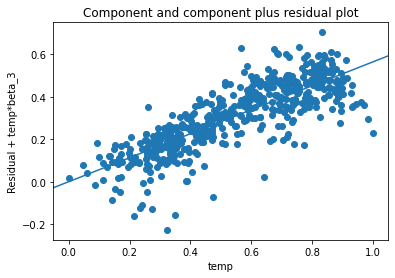

In [73]:
sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

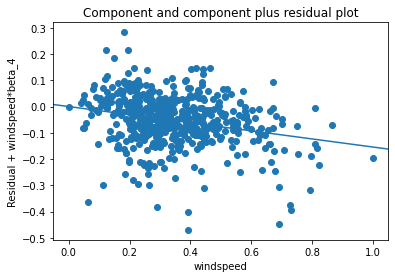

In [74]:
sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

#### The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved

#### Homoscedasticity 

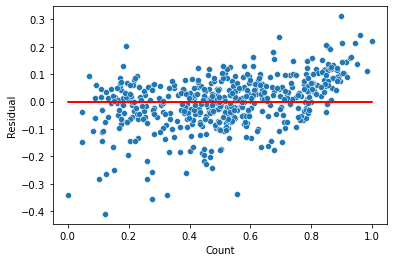

In [75]:
y_train_pred = lr6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### There is no visible pattern in residual values, thus homoscedacity is well preserved

## Absence of Multicolinearity 

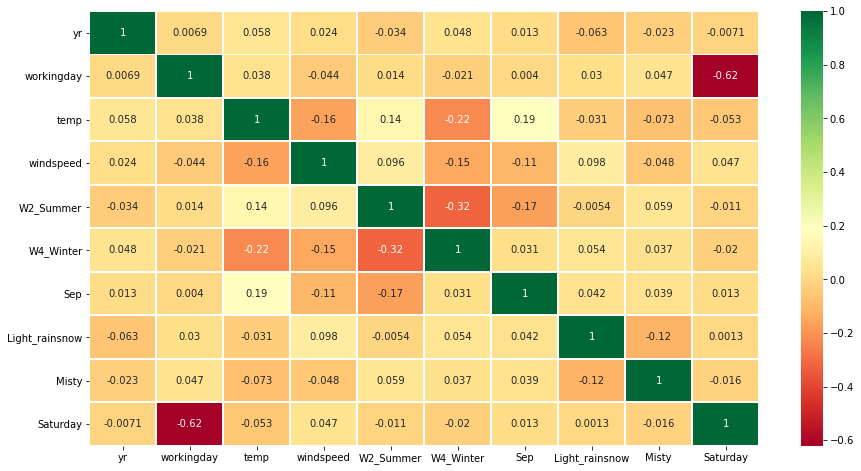

In [76]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [77]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.71
1,workingday,4.03
3,windspeed,4.03
0,yr,2.00
9,Saturday,1.65
4,W2_Summer,1.55
8,Misty,1.53
5,W4_Winter,1.38
6,Sep,1.20
7,Light_rainsnow,1.07


#### All the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables.

## Normality of Error 

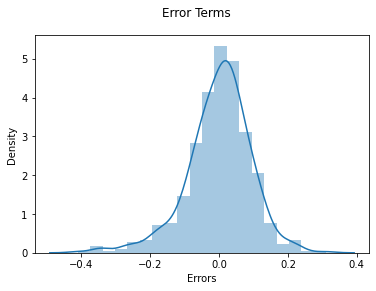

In [78]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

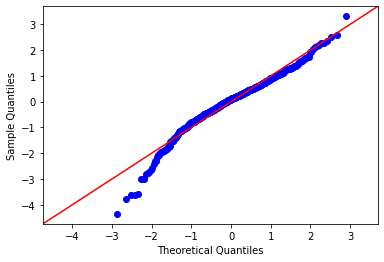

In [79]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

#### Based on the histogram, we can conclude that error terms are following a normal distribution

## Making Predictions using final model 

#### Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data.In other words, we want to prevent the information leak from train to test dataset.

In [80]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,1,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,1,0,0,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,1,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,1,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,0,0,0,1,0


In [81]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,0.550981,0.527344,0.662328,0.346015,0.519816,0.268182,0.245455,...,0.086364,0.081818,0.036364,0.322727,0.154545,0.127273,0.150000,0.172727,0.145455,0.118182
std,0.501120,0.198531,0.466833,0.228967,0.214959,0.143278,0.159517,0.219880,0.444023,0.431338,...,0.281541,0.274713,0.187620,0.468586,0.362295,0.334038,0.357886,0.378873,0.353363,0.323559
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
# Dividing X_test and y_test 
y_test = bike_test.pop('cnt')
X_test = bike_test

In [83]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   temp            220 non-null    float64
 4   windspeed       220 non-null    float64
 5   W2_Summer       220 non-null    uint8  
 6   W4_Winter       220 non-null    uint8  
 7   Sep             220 non-null    uint8  
 8   Light_rainsnow  220 non-null    uint8  
 9   Misty           220 non-null    uint8  
 10  Saturday        220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [84]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

## Model Evaluation 

Text(0, 0.5, 'y_pred')

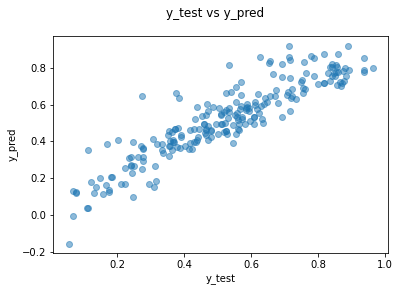

In [85]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

In [86]:
# R2 Value Calculation for bike_test dataframe
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8206

In [87]:
#Adjusted R2 Value Calculation for bike_test dataframe 
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.812

#### Model Train & Test R2 Statsitics Comparison

 R2 Value - (82.4%) : Test Dataset(82%)	       	         

Adjusted R2 Value - Train Dataset(82.1%) :	Test Dataset( 81.2%)	        

It seems to be really a good model that can generalize various datasets.


In [88]:
#Calculating RMSE for the selected Model 
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0929

We can see that the equation of our best fitted line is:

 cnt = 0.199648 + 0.491508  X  temp + 0.233482  X  yr + 0.083084 X season_Winter - 0.066942 X season_ Spring	 + 0.083084 X season_Winter -0.052418 X mnth_Jul + 0.076686 X mnth_Sep -0.285155 X weathersit_Light Snow & Rain -0.081558 X weathersit_Mist & Cloudy -0.098013 X holiday -0.147977X windspeed 

##### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.

##### All the negative coefficients  indicate that an increase in these values will lead to an decrease in the value of cnt.

- Temp is the most significant with the largest coefficient.
- Followed by weathersit_Light Snow & Rain.
- Bike rentals is more for the month of september
- The rentals reduce during holidays


This indicates that the bike rentals is majorly affected by temperature,season and month.